In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pickle

In [19]:
df=pd.read_csv("Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv")

In [20]:
print("Shape of the dataset:", df.shape)
num_rows, num_columns = df.shape
print("Number of rows: " , num_rows)
print("Number of columns: " , num_columns)

Shape of the dataset: (576, 6)
Number of rows:  576
Number of columns:  6


In [21]:
print("Dataset: ")
print(df)

Dataset: 
     Unnamed: 0  Months_since_Last_Donation  Number_of_Donations  \
0           619                           2                   50   
1           664                           0                   13   
2           441                           1                   16   
3           160                           2                   20   
4           358                           1                   24   
..          ...                         ...                  ...   
571         698                          23                    1   
572         433                          16                    3   
573         360                          21                    2   
574         541                          39                    1   
575          74                          72                    1   

     Total_Volume_Donated  Months_since_First_Donation  \
0                   12500                           98   
1                    3250                           28   

In [22]:
#To show the data type of the dataset
print("\nData Type")
print(df.dtypes)


Data Type
Unnamed: 0                     int64
Months_since_Last_Donation     int64
Number_of_Donations            int64
Total_Volume_Donated           int64
Months_since_First_Donation    int64
Made Donation in March 2007    int64
dtype: object


In [23]:
print(df.isnull().sum())

Unnamed: 0                     0
Months_since_Last_Donation     0
Number_of_Donations            0
Total_Volume_Donated           0
Months_since_First_Donation    0
Made Donation in March 2007    0
dtype: int64


In [24]:
description = df.describe()
print("\nDescription of the dataset:")
print(description)


Description of the dataset:
       Unnamed: 0  Months_since_Last_Donation  Number_of_Donations  \
count  576.000000                  576.000000           576.000000   
mean   374.034722                    9.439236             5.427083   
std    216.947773                    8.175454             5.740010   
min      0.000000                    0.000000             1.000000   
25%    183.750000                    2.000000             2.000000   
50%    375.500000                    7.000000             4.000000   
75%    562.500000                   14.000000             7.000000   
max    747.000000                   74.000000            50.000000   

       Total_Volume_Donated  Months_since_First_Donation  \
count            576.000000                   576.000000   
mean            1356.770833                    34.050347   
std             1435.002556                    24.227672   
min              250.000000                     2.000000   
25%              500.000000             

In [25]:
print("\nHead of the dataset:")
print(df.head())


Head of the dataset:
   Unnamed: 0  Months_since_Last_Donation  Number_of_Donations  \
0         619                           2                   50   
1         664                           0                   13   
2         441                           1                   16   
3         160                           2                   20   
4         358                           1                   24   

   Total_Volume_Donated  Months_since_First_Donation  \
0                 12500                           98   
1                  3250                           28   
2                  4000                           35   
3                  5000                           45   
4                  6000                           77   

   Made Donation in March 2007  
0                            1  
1                            1  
2                            1  
3                            1  
4                            0  


In [26]:
print("\nTail of the dataset:")
print(df.tail())


Tail of the dataset:
     Unnamed: 0  Months_since_Last_Donation  Number_of_Donations  \
571         698                          23                    1   
572         433                          16                    3   
573         360                          21                    2   
574         541                          39                    1   
575          74                          72                    1   

     Total_Volume_Donated  Months_since_First_Donation  \
571                   250                           23   
572                   750                           86   
573                   500                           52   
574                   250                           39   
575                   250                           72   

     Made Donation in March 2007  
571                            0  
572                            0  
573                            0  
574                            0  
575                            0  


In [27]:
df.dropna(inplace=True)
df

,Unnamed: 0,Months_since_Last_Donation,Number_of_Donations,Total_Volume_Donated,Months_since_First_Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
...,...,...,...,...,...,...
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0


In [28]:
df.rename(columns={'Made Donation in March 2007': 'Eligible for donation or not'}, inplace=True)
df

,Unnamed: 0,Months_since_Last_Donation,Number_of_Donations,Total_Volume_Donated,Months_since_First_Donation,Eligible for donation or not
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
...,...,...,...,...,...,...
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0


In [34]:
# Replace the column names with correct names
df = df.rename(columns={'Months since Last Donation': 'Months since Last Donation',
                        'Number of Donations       ': 'Number of Donations',
                        'Total Volume Donated (c.c.)': 'Total Volume Donated',
                        'Months since First Donation    ': 'Months since First Donation'})

df.columns


Index(['Unnamed: 0', 'Months_since_Last_Donation', 'Number_of_Donations',
       'Total_Volume_Donated', 'Months_since_First_Donation',
       'Eligible for donation or not'],
      dtype='object')

In [35]:
# Now you can access the columns using correct names
X = df[['Months_since_Last_Donation', 'Number_of_Donations', 'Total_Volume_Donated', 'Months_since_First_Donation']]
y = df['Eligible for donation or not']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [38]:
# Initialize the SVC model
svc_model = SVC(kernel='linear', random_state=42)

In [39]:
# Train the SVC model
svc_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [40]:
# Make predictions
y_pred = svc_model.predict(X_test_scaled)


In [41]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        87
           1       0.00      0.00      0.00        29

    accuracy                           0.75       116
   macro avg       0.38      0.50      0.43       116
weighted avg       0.56      0.75      0.64       116



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


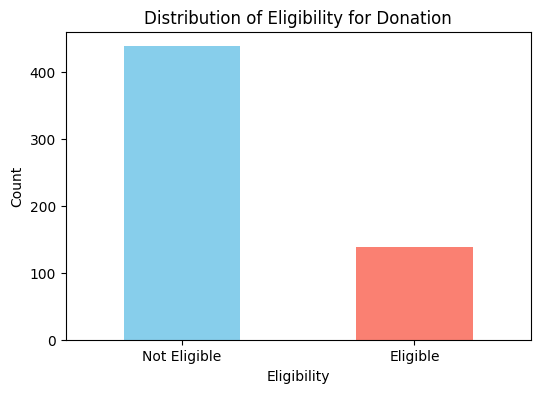

In [42]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
df['Eligible for donation or not'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Eligibility for Donation')
plt.xlabel('Eligibility')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Eligible', 'Eligible'], rotation=0)
plt.show()

In [43]:
#save the model to a file using pickle
with open('svc_model.pkl','wb') as f:
  pickle.dump(svc_model, f)